Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading csv files

In [ ]:
email_df = pd.read_csv('email_table.csv')
opened_df = pd.read_csv('email_opened_table.csv')
clicked_df = pd.read_csv('link_clicked_table.csv')

Data preview

In [ ]:
print("Emails Table:")
print(email_df.head())

print("\nOpened Emails Table:")
print(opened_df.head())

print("\nClicked Emails Table:")
print(clicked_df.head())

Emails Table:
   email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  
0                    5  
1                    2  
2                    2  
3                    1  
4                    6  

Opened Emails Table:
   email_id
0    284534
1    609056
2    220820
3    905936
4    164034

Clicked Emails Table:
   email_id
0    609056
1    870980
2    935124
3    158501
4    177561


Checking for missing values

In [ ]:
print(email_df.isnull().sum())

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64


Checking for any outliers

<Axes: xlabel='user_past_purchases'>

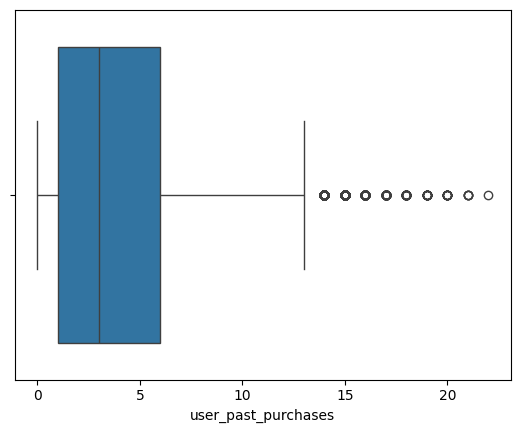

In [ ]:
sns.boxplot(x=email_df['user_past_purchases'])

Adding open and click flags

In [ ]:
email_df['is_opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['is_clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

Checking overall open and click rates

In [ ]:
open_rate = email_df['is_opened'].mean()
click_rate = email_df['is_clicked'].mean()

Displaying open and click rates

In [ ]:
print(f"Open rate: {open_rate*100:.2f}%")
print(f"Click rate: {click_rate*100:.2f}%")

Open rate: 10.35%
Click rate: 2.12%


Exploratory Data Analysis (EDA)

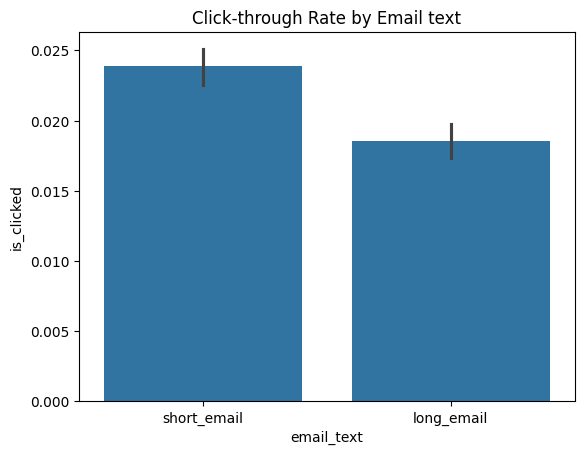

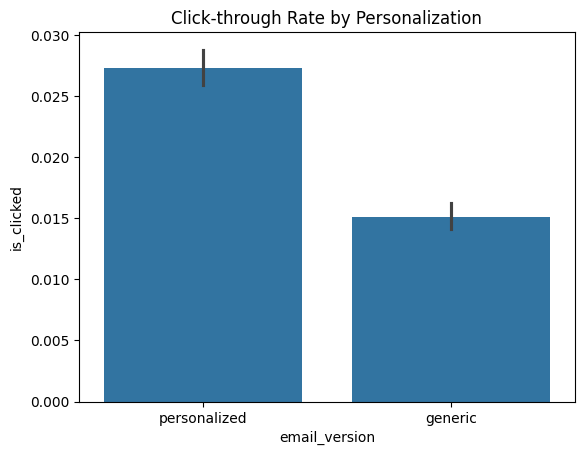

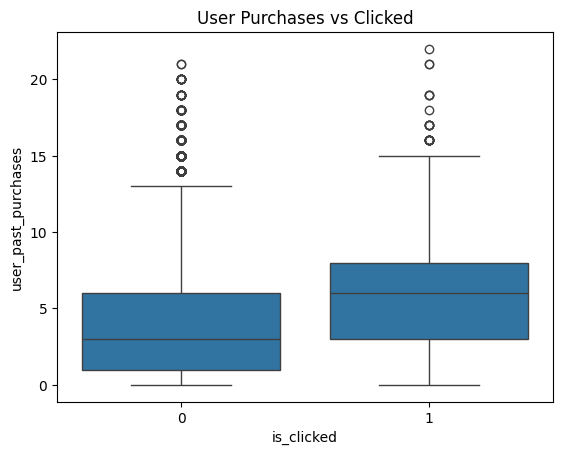

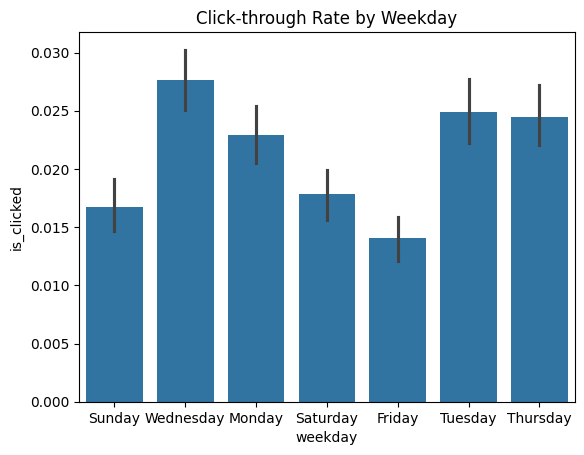

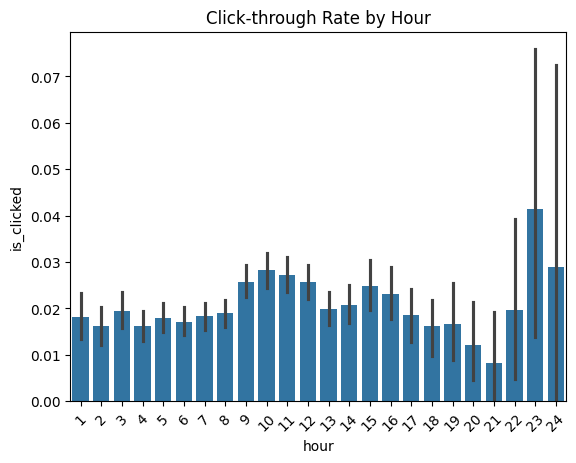

In [ ]:
# EDA on email text version
sns.barplot(data = email_df, x = 'email_text', y = 'is_clicked')
plt.title('Click-through Rate by Email text')
plt.show()
print("\n")

# EDA on email personalization
sns.barplot(data = email_df, x = 'email_version', y = 'is_clicked')
plt.title('Click-through Rate by Personalization')
plt.show()
print("\n")

# EDA on user past purchases
sns.boxplot(data = email_df, x = 'is_clicked', y = 'user_past_purchases')
plt.title('User Purchases vs Clicked')
plt.show()
print("\n")

# EDA on weekday
sns.barplot(data =  email_df, x = 'weekday', y = 'is_clicked')
plt.title('Click-through Rate by Weekday')
plt.show()
print("\n")

# EDA on hour
sns.barplot(data = email_df, x = 'hour', y = 'is_clicked')
plt.title('Click-through Rate by Hour')
plt.xticks(rotation = 45)
plt.show()

Model development

In [ ]:
# Importing necessary libraries for evaluating the best performing model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Encoding categorical variables
df = pd.get_dummies(email_df, columns=['email_text', 'email_version', 'weekday', 'user_country'], drop_first = True)

# Features and target
X = df.drop(columns = ['email_id', 'is_clicked', 'is_opened'])
y = df['is_clicked']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

# Model1: Logistic Regression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:,1]

# Model2: Random Forest
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]

# Function to evaluate different models
def eval_model(name, y_true, y_pred, y_prob):
  print(f"\n=== {name} ===")
  print("Accuracy Score:", accuracy_score(y_true, y_pred))
  print("AUC Score:", roc_auc_score(y_true, y_prob))
  print("Classification Report:\n", classification_report(y_true, y_pred, zero_division = 0))

# Evaluation
eval_model("Logistic Regression", y_test, lr_pred, lr_prob)
eval_model("Random Forest", y_test, rf_pred, rf_prob)


=== Logistic Regression ===
Accuracy Score: 0.9788
AUC Score: 0.735082330308194
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.00      0.00      0.00       424

    accuracy                           0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000


=== Random Forest ===
Accuracy Score: 0.97585
AUC Score: 0.5793647255784903
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.07      0.01      0.02       424

    accuracy                           0.98     20000
   macro avg       0.53      0.50      0.50     20000
weighted avg       0.96      0.98      0.97     20000



Visual Comparison across models

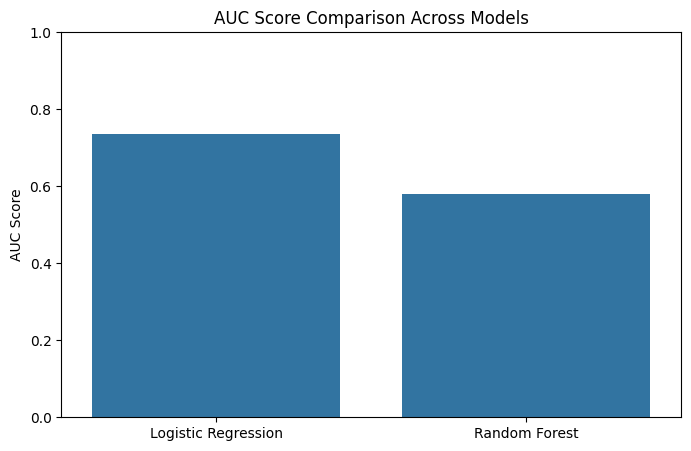

In [31]:
models = ['Logistic Regression', 'Random Forest']
auc_scores = [
    roc_auc_score(y_test, lr_prob),
    roc_auc_score(y_test, rf_prob)
]

plt.figure(figsize = (8,5))
sns.barplot(x = models, y = auc_scores)
plt.title('AUC Score Comparison Across Models')
plt.ylabel('AUC Score')
plt.ylim(0.0, 1.0)
plt.show()

So, as we observed from the Classification Report, the Accuracy scores and the AUC scores with their comparison across different models in result format as well as in Visual Comparison format, we deduce that "Logistic Regression" model will perform better in this case. Hence, we opt it as our best model in the current scenario.



Taking this into consideration, the further analysis will consist of all the parameters related to Logistic Regression.

Model Impact on CTR

In [ ]:
# Simulate: If we only send to top 20% most likely to click
X_test_lr = X_test.copy()
X_test_lr['click_prob'] = lr_prob

# Top 20% most likely to click
top_20_percent = X_test_lr.sort_values(by = 'click_prob', ascending = False).head(int(0.2 * len(X_test_lr)))

# Matching the indices to ground truth & actual CTR
simulated_ctr = y_test.loc[top_20_percent.index].mean()
actual_ctr = y_test.mean()

print(f"Simulated CTR if only top 20% targeted: {simulated_ctr * 100:.2f}%")
print(f"Actual CTR: {actual_ctr * 100:.2f}%")
print(f"Potential CTR Uplift: {(simulated_ctr - actual_ctr) * 100:.2f}%")

Simulated CTR if only top 20% targeted: 5.22%
Actual CTR: 2.12%
Potential CTR Uplift: 3.10%


Segment Analysis

Top 10 High CTR Segments:

   user_country   email_text email_version  is_clicked
15           US  short_email  personalized    0.036013
11           UK  short_email  personalized    0.035786
13           US   long_email  personalized    0.027065
9            UK   long_email  personalized    0.026405
10           UK  short_email       generic    0.020379
14           US  short_email       generic    0.019074
8            UK   long_email       generic    0.016209
12           US   long_email       generic    0.015541
7            FR  short_email  personalized    0.013447
3            ES  short_email  personalized    0.011222




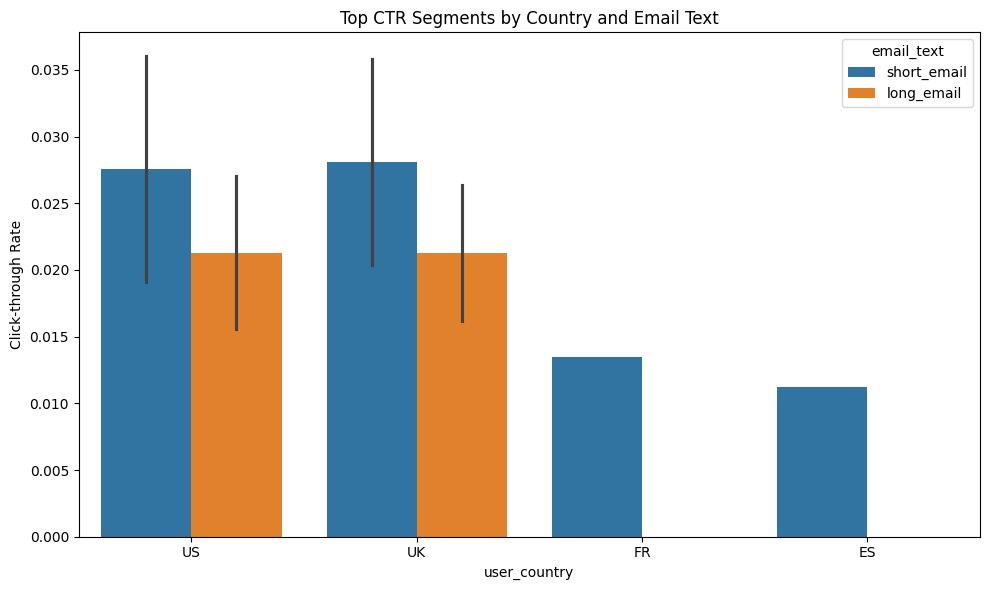

In [30]:
# Segment-wise click-through rate
segment_ctr = email_df.groupby(['user_country', 'email_text', 'email_version'])['is_clicked'].mean().reset_index()

# Top 10 performing segments
top_10_segments = segment_ctr.sort_values(by = 'is_clicked', ascending = False).head(10)
print('Top 10 High CTR Segments:\n')
print(top_10_segments)
print('\n')

# Plot of Top 10 segments
plt.figure(figsize = (10, 6))
sns.barplot(data = top_10_segments, x = 'user_country', y = 'is_clicked', hue = 'email_text')
plt.title("Top CTR Segments by Country and Email Text")
plt.ylabel("Click-through Rate")
plt.xticks()
plt.tight_layout()
plt.show()

Feature Importance

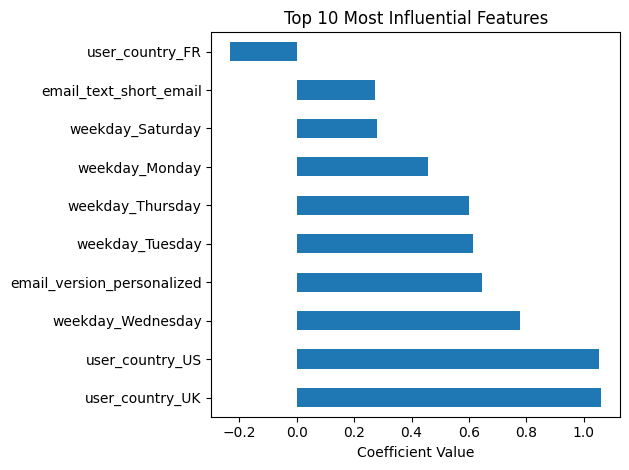

In [29]:
importance = pd.Series(lr.coef_[0], index = X.columns)
top_features = importance.sort_values(key = abs, ascending = False).head(10)

top_features.plot(kind = 'barh', title = 'Top 10 Most Influential Features')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()